Cell 1 – Mount Google Drive

This step connects Google Colab with your Google Drive.
It allows the notebook to access the Excel sheet saved in your Drive.
You will be asked to log in and give permission. Once connected, the data file becomes readable by the notebook. *italicized text:*

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Cell 2 – Set File Path

Here we tell the computer exactly where the Excel file is stored in Drive.
For example, if the file is in “MyDrive”, we use that location.
This path helps Python find the dataset for analysis.

In [3]:
# Example path inside your Google Drive
file_path = "/content/drive/MyDrive/SALIVARY DUCT CA .xlsx"


Cell 3 – Install and Import Libraries

These are the software tools (called libraries) that help us read Excel data, do calculations, and make graphs.
Think of them as different departments:

pandas handles tables (like Excel)

numpy handles numbers

seaborn and matplotlib draw colorful graphs

statsmodels and scipy handle statistical analysis.

This cell just loads them; it doesn’t give output.

In [5]:
# Uncomment the next line the first time if any library is missing
# %pip install pandas numpy scipy scikit-learn statsmodels seaborn matplotlib openpyxl

import os, re, warnings
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set(context="notebook", style="whitegrid", palette="viridis")

print("Libraries loaded successfully.")


Libraries loaded successfully.


Cell 4 – Load and Inspect the Excel File

This cell opens the Excel sheet and shows the first few rows so we can check if the data has loaded properly.
It also prints the total number of rows (patients) and columns (variables).
You should see familiar column names like Margins, Shape, Necrosis, etc.

In [19]:
from google.colab import files
uploaded = files.upload()


Saving SALIVARY DUCT CA .xlsx to SALIVARY DUCT CA .xlsx


In [20]:
import pandas as pd

file_path = "SALIVARY DUCT CA .xlsx"   # uploaded file lives in /content by default
xl = pd.ExcelFile(file_path)
print("Sheets found:", xl.sheet_names)

sheet_name = xl.sheet_names[0]
df_raw = xl.parse(sheet_name)
print("Selected sheet:", sheet_name)
print("Shape:", df_raw.shape)
df_raw.head(10)


Sheets found: ['Sheet1']
Selected sheet: Sheet1
Shape: (34, 34)


,Case No,Path No,Patient Name,Age at diagnosis,Gender,Symptom at presentation,Baseline MRI date,PRIMARY TUMOR SITE,LOBE,LATERALITY,...,LN ENE,DISTANT MET (YES/ NO),DIST MET LOCATION,DIST MET WHEN?,PET date (Dist met),CLINICAL NODE STATUS,INTENT OF TREATMENT,DATE OF REGISTRATION,DATE OF SURGERY,FOLLOW UP STATUS
0,KA/05425,002194/KB,Mrs. SONARI .,35 Years,F,"parotid swelling, LN swelling, FN palsy",2018-12-12 00:00:00,parotid,both,right,...,yes,NaN,"bones, lungs, mediastinal nodes",11 months,21-11-2019,NaN,PALLIATIVE,28/11/2018,NaN,NaN
1,18F2023/002175,013552/KF,Mr. RAMESH KUMAR DUBEY,55 Years,M,parotid swelling,2019-01-01 00:00:00,PAROTID,both,LEFT,...,NaN,YES,lungs,18 MONTHS,2023-08-09 00:00:00,NaN,PALLAITIVE,14/2/2023,NaN,PROGRESSION
2,18F2023/011170,013189/KF,Mr. SHYAM SUNDER MOURYA,65 Years,M,LN swelling,NaN,CUP,NaN,LEFT,...,yes,NO,NaN,NaN,2023-09-09 00:00:00,NaN,NaN,24/7/2023,NaN,NaN
3,KE/04785,011911/KF,Smt. MOHRA DEVI,73 Years,F,LN swelling,13-3-2022,SUBMANDIBULAR,both,RIGHT,...,no,NO,NaN,NaN,22-08-2023,LEVEL IB,CURATIVE,2022-06-04 00:00:00,15-6-2022,LRC+
4,18F2023/008590,009935/KF,Mr. ABDUL KASIM,49 Years,M,parotid swelling,19-6-2023,PAROTID,both,RIGHT,...,NaN,NaN,NaN,NaN,2023-06-07 00:00:00,NaN,NaN,NaN,NaN,NaN
5,18F2023/008674,009630/KF,KAMRUDDIN ..,72 Years,M,"parotid swelling, FN palsy",30/8/22,PAROTID,both,RIGHT,...,no,YES,bones,NaN,28-06-2023,LEVEL II,PALLIATIVE,2023-12-06 00:00:00,2023-07-08 00:00:00,POOR PROGNOSIS
6,18F2023/006965,009242/KF,Mr. MAHENDRA SINGH,68 Years,M,parotid swelling,22/05/2023,PAROTID,both,LEFT,...,NaN,NO,NaN,NaN,27-06-2023,NaN,CURATIVE,15/5/2023,17/6/23,LRC+
7,18F2023/007951,008654/KF,Mr. VINOD KUMAR,50 Years,M,"parotid swelling, LN swelling",NaN,parotid,both,right,...,yes,NO,NaN,NaN,13-06-2023,NaN,PALLIATIVE,30/5/2023,NaN,NaN
8,18F2023/003292,008153/KF,Mr. JAYRAM ..,48 Years,M,LN swelling,21/3/23,SUBMANDIBULAR,superficial,RIGHT,...,no,YES,"bones, lungs, liver",14MONTHS,19-06-2023,LEVEL IB,PALLIATIVE,2023-06-03 00:00:00,30/5/2023,GUARDED PROGNOSIS
9,18F2023/008076,008320/KF,Mr. RUDRA PRATAP SINGH,64 Years,M,LN swelling,25-5-2023,CUP,NaN,RIGHT,...,no,NO,NaN,NaN,14-06-2023,NaN,PALLIATIVE,2023-01-06 00:00:00,NaN,NaN


Cell 5 – Clean Column Names

Medical data often have long column names or extra spaces.
This step cleans those names by turning them into simpler, computer-friendly versions (like converting “Enhancement pattern (heterogeneous/homogeneous)” into “enhancement_pattern_heterogeneous_homogeneous”).
It helps prevent typing errors later.
You’ll see a small table showing the original names and the cleaned ones.

In [21]:
def clean_name(c):
    s = re.sub(r"\s+", " ", str(c)).strip()
    s = s.replace("/", " ").replace("(", " ").replace(")", " ").replace("-", " ")
    s = re.sub(r"[^A-Za-z0-9 ]+", "", s)
    s = re.sub(r"\s+", "_", s).lower()
    return s

mapping = pd.DataFrame({
    "raw": df_raw.columns,
    "clean": [clean_name(c) for c in df_raw.columns]
})
display(mapping)

df = df_raw.copy()
df.columns = mapping["clean"].tolist()

print("Cleaned column names applied.")
df.head(5)


,raw,clean
0,Case No,case_no
1,Path No,path_no
2,Patient Name,patient_name
3,Age at diagnosis,age_at_diagnosis
4,Gender,gender
5,Symptom at presentation,symptom_at_presentation
6,Baseline MRI date,baseline_mri_date
7,PRIMARY TUMOR SITE,primary_tumor_site
8,LOBE,lobe
9,LATERALITY,laterality


Cleaned column names applied.


,case_no,path_no,patient_name,age_at_diagnosis,gender,symptom_at_presentation,baseline_mri_date,primary_tumor_site,lobe,laterality,...,ln_ene,distant_met_yes_no_,dist_met_location,dist_met_when,pet_date_dist_met_,clinical_node_status,intent_of_treatment,date_of_registration,date_of_surgery,follow_up_status
0,KA/05425,002194/KB,Mrs. SONARI .,35 Years,F,"parotid swelling, LN swelling, FN palsy",2018-12-12 00:00:00,parotid,both,right,...,yes,NaN,"bones, lungs, mediastinal nodes",11 months,21-11-2019,NaN,PALLIATIVE,28/11/2018,NaN,NaN
1,18F2023/002175,013552/KF,Mr. RAMESH KUMAR DUBEY,55 Years,M,parotid swelling,2019-01-01 00:00:00,PAROTID,both,LEFT,...,NaN,YES,lungs,18 MONTHS,2023-08-09 00:00:00,NaN,PALLAITIVE,14/2/2023,NaN,PROGRESSION
2,18F2023/011170,013189/KF,Mr. SHYAM SUNDER MOURYA,65 Years,M,LN swelling,NaN,CUP,NaN,LEFT,...,yes,NO,NaN,NaN,2023-09-09 00:00:00,NaN,NaN,24/7/2023,NaN,NaN
3,KE/04785,011911/KF,Smt. MOHRA DEVI,73 Years,F,LN swelling,13-3-2022,SUBMANDIBULAR,both,RIGHT,...,no,NO,NaN,NaN,22-08-2023,LEVEL IB,CURATIVE,2022-06-04 00:00:00,15-6-2022,LRC+
4,18F2023/008590,009935/KF,Mr. ABDUL KASIM,49 Years,M,parotid swelling,19-6-2023,PAROTID,both,RIGHT,...,NaN,NaN,NaN,NaN,2023-06-07 00:00:00,NaN,NaN,NaN,NaN,NaN


Cell 6 – Create Helper Functions

These are small reusable instructions.

They clean messy text (“Yes”, “Present”, “positive”) into simple “yes/no”.

They pull numbers out of text like “3.2 cm”.

They help standardize different styles of data entry.

This cell doesn’t show an output but sets up useful tools for the next steps.

In [22]:
def norm_str(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    s = s.replace("—", "-").replace("–", "-")
    s = re.sub(r"\s+", " ", s)
    if s in ("", "nan", "none", "na"):
        return np.nan
    return s

def map_yes_no(x):
    s = norm_str(x)
    if pd.isna(s): return np.nan
    yes = {"yes","y","present","positive","pos","p","ene present"}
    no  = {"no","n","absent","negative","neg","ene absent"}
    if s in yes: return "yes"
    if s in no:  return "no"
    return s

def parse_num(x):
    if pd.isna(x): return np.nan
    m = re.search(r"(\d+(\.\d+)?)", str(x))
    return float(m.group(1)) if m else np.nan

def bin_from_values(series, pos_values, neg_values):
    return series.apply(lambda v: 1 if norm_str(v) in pos_values else (0 if norm_str(v) in neg_values else np.nan))


Cell 7 – Standardize Radiology Features

Each radiological feature column is now cleaned and made consistent.
For example:

“Margins (well/ill defined)” becomes “margins_std”

“Shape (lobulated/irregular)” becomes “shape_std”

“Enhancement pattern” becomes “enhancement_std”

“_std” means “standardized”.

This step prepares the data for statistical comparison.
It also converts all “yes/no” type columns (e.g., perineural spread, extraparenchymal extension, LN ENE, distant metastasis) into simple yes/no values.

In [35]:
# === CELL 7 (exact mapping to your columns) ===
# This cell standardizes your radiology variables and creates *_std columns.

import re
import numpy as np
import pandas as pd

# If you already defined these in Cell 6, you can skip redefining.
def norm_str(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    s = s.replace("—","-").replace("–","-")
    s = re.sub(r"\s+", " ", s)
    if s in ("", "nan", "none", "na"):
        return np.nan
    return s

def map_yes_no(x):
    s = norm_str(x)
    if pd.isna(s): return np.nan
    yes = {"yes","y","present","positive","pos","p","ene present"}
    no  = {"no","n","absent","negative","neg","ene absent"}
    if s in yes: return "yes"
    if s in no:  return "no"
    return s

def parse_num(x):
    if pd.isna(x): return np.nan
    m = re.search(r"(\d+(\.\d+)?)", str(x))
    return float(m.group(1)) if m else np.nan

# Make a working copy
work = df.copy()

# --- exact column names from your dataset ---
col_age    = "age_at_diagnosis"
col_size   = "size_cm_"  # tumor size
col_locinv = "local_invasion_skin_bone_facial_nerve_"
col_shape  = "shape_lobulated_irregular_"
col_marg   = "margins_well_defined_ill_defined_"
col_enh    = "enhancement_pattern_heterogeneous_homogeneous_necrosis_cystic_areas_"
col_necr   = "necrosis"
col_pni    = "perineural_spread_present_absent_"
col_epe    = "extraparenchymal_extension_yes_no_"
col_lnnec  = "ln_necrosis"
col_lnen   = "ln_ene"
col_dist   = "distant_met_yes_no_"
col_fu     = "follow_up_status"

# --- numeric helpers ---
if col_age in work.columns:
    work["age_years_std"] = work[col_age].apply(parse_num)

if col_size in work.columns:
    work["size_num"] = work[col_size].apply(parse_num)

# --- standardize radiology text fields ---

# margins: normalize “well defined/ill defined” to consistent tokens
if col_marg in work.columns:
    def fix_margins(x):
        s = norm_str(x)
        if s == "well defined": return "well-defined"
        if s == "ill defined":  return "ill-defined"
        return s
    work["margins_std"] = work[col_marg].apply(fix_margins)

# shape: expect lobulated / irregular
if col_shape in work.columns:
    work["shape_std"] = work[col_shape].apply(norm_str)

# enhancement: map to {heterogeneous, homogeneous, necrosis, cystic}
if col_enh in work.columns:
    def map_enh(x):
        s = norm_str(x)
        if s is np.nan: return np.nan
        if "necros" in s: return "necrosis"
        if "hetero" in s: return "heterogeneous"
        if "cyst"  in s: return "cystic"
        if "homog" in s: return "homogeneous"
        return s
    work["enhancement_std"] = work[col_enh].apply(map_enh)

# binary/yes-no style fields
for src, out in [
    (col_necr, "necrosis_std"),
    (col_pni,  "perineural_std"),
    (col_epe,  "extraparenchymal_std"),
    (col_lnnec,"ln_necrosis_std"),
    (col_lnen, "ln_ene_std"),
    (col_dist, "distant_met_std"),
]:
    if src in work.columns:
        work[out] = work[src].apply(map_yes_no)

# follow-up (keep as normalized text for later pattern checks)
if col_fu in work.columns:
    work["followup_std"] = work[col_fu].apply(norm_str)

# local invasion is free text; keep normalized (we’ll use it later if needed)
if col_locinv in work.columns:
    work["local_invasion_std"] = work[col_locinv].apply(norm_str)

# ---- show what was created and a quick preview ----
std_cols = [c for c in [
    "age_years_std","size_num","margins_std","shape_std","enhancement_std",
    "necrosis_std","perineural_std","extraparenchymal_std",
    "ln_ene_std","ln_necrosis_std","distant_met_std","followup_std","local_invasion_std"
] if c in work.columns]

print("standardized columns created:")
print(std_cols)

display(work[std_cols].head(10))

# Keep 'work' available to downstream cells (Cell 8+ use it)


standardized columns created:
['age_years_std', 'size_num', 'margins_std', 'shape_std', 'enhancement_std', 'necrosis_std', 'perineural_std', 'extraparenchymal_std', 'ln_ene_std', 'ln_necrosis_std', 'distant_met_std', 'followup_std', 'local_invasion_std']


,age_years_std,size_num,margins_std,shape_std,enhancement_std,necrosis_std,perineural_std,extraparenchymal_std,ln_ene_std,ln_necrosis_std,distant_met_std,followup_std,local_invasion_std
0,35.0,6.0,ill-defined,irregular,heterogeneous,no,yes,yes,yes,no,NaN,NaN,skin
1,55.0,NaN,well-defined,irregular,yes,yes,no,no,NaN,NaN,yes,progression,skull base
2,65.0,6.0,well-defined,lobulated,yes,yes,no,no,yes,yes,no,NaN,skin
3,73.0,4.0,well-defined,lobulated,yes,yes,yes,yes,no,yes,no,lrc+,NaN
4,49.0,3.5,well-defined,lobulated,yes,yes,yes,yes,NaN,NaN,NaN,NaN,fn
5,72.0,3.0,well-defined,lobulated,yes,yes,yes,yes,no,yes,yes,poor prognosis,skin
6,68.0,3.0,ill-defined,lobulated,yes,no,yes,yes,NaN,NaN,no,lrc+,pterygoid plates
7,50.0,2.5,well-defined,lobulated,yes,yes,yes,yes,yes,yes,no,NaN,skin
8,48.0,11.0,ill-defined,irregular,yes,yes,no,yes,no,yes,yes,guarded prognosis,skin
9,64.0,4.0,well-defined,lobulated,yes,yes,yes,yes,no,no,no,NaN,NaN


Cell 8 – Create the Radiologic Aggressiveness Index (RAI)

Here we create new numeric scores to show how “malignant-looking” each case appears radiologically.

For every feature:

A malignant pattern (like ill-defined margins, irregular shape, heterogeneous enhancement, perineural spread, etc.) is scored 1.

A benign pattern (like well-defined, lobulated, homogeneous) is scored 0.

Then all scores are added to make a total RAI – Radiologic Aggressiveness Index.
A higher RAI means more radiologically aggressive disease.

A histogram appears showing how many patients fall into low, medium, or high RAI scores.


standardized columns found: ['margins_std', 'shape_std', 'enhancement_std', 'necrosis_std', 'perineural_std', 'extraparenchymal_std', 'ln_ene_std', 'ln_necrosis_std']
aggressive flags created: ['margins_aggr', 'shape_aggr', 'enhance_aggr', 'necrosis_aggr', 'pni_aggr', 'epe_aggr', 'lnene_aggr', 'lnnec_aggr']


,margins_aggr,shape_aggr,enhance_aggr,necrosis_aggr,pni_aggr,epe_aggr,lnene_aggr,lnnec_aggr,RAI
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,6.0
1,0.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,2.0
2,0.0,0.0,NaN,1.0,0.0,0.0,1.0,1.0,3.0
3,0.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0,4.0
4,0.0,0.0,NaN,1.0,1.0,1.0,NaN,NaN,3.0
5,0.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0,4.0
6,1.0,0.0,NaN,0.0,1.0,1.0,NaN,NaN,3.0
7,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,5.0
8,1.0,1.0,NaN,1.0,0.0,1.0,0.0,1.0,5.0
9,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,3.0


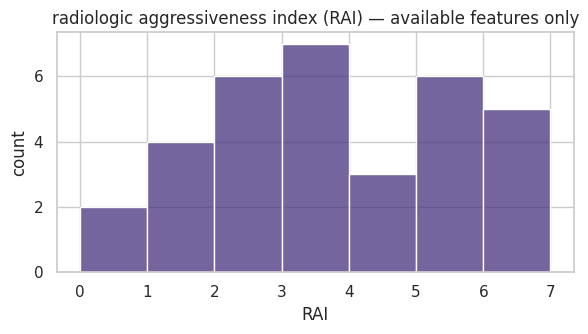

In [36]:
# === CELL 8 (robust): create aggressive flags + RAI only from columns that exist, then plot safely ===

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# safety: if you ran cell 7, 'work' should exist; if not, fall back to df
if "work" not in globals():
    work = df.copy()

# helper functions (redeclared here so this cell works independently)
def norm_str(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    s = s.replace("—","-").replace("–","-")
    s = re.sub(r"\s+", " ", s)
    if s in ("", "nan", "none", "na"):
        return np.nan
    return s

def bin_from_values(series, pos_values, neg_values):
    return series.apply(
        lambda v: 1.0 if norm_str(v) in pos_values
        else (0.0 if norm_str(v) in neg_values
              else np.nan)
    )

# map of standardized -> aggressive flag rules
# the left-hand keys are the standardized columns we expect from cell 7
rules = {
    "margins_std":          ({"ill-defined"},                  {"well-defined"},         "margins_aggr"),
    "shape_std":            ({"irregular"},                    {"lobulated"},            "shape_aggr"),
    "enhancement_std":      ({"heterogeneous","necrosis"},     {"homogeneous","cystic"}, "enhance_aggr"),
    "necrosis_std":         ({"yes"},                          {"no"},                   "necrosis_aggr"),
    "perineural_std":       ({"yes"},                          {"no"},                   "pni_aggr"),
    "extraparenchymal_std": ({"yes"},                          {"no"},                   "epe_aggr"),
    "ln_ene_std":           ({"yes"},                          {"no"},                   "lnene_aggr"),
    "ln_necrosis_std":      ({"yes"},                          {"no"},                   "lnnec_aggr"),
}

# report which standardized columns are actually present
present_std_cols = [c for c in rules.keys() if c in work.columns]
missing_std_cols = [c for c in rules.keys() if c not in work.columns]

print("standardized columns found:", present_std_cols)
if missing_std_cols:
    print("standardized columns missing (will be skipped):", missing_std_cols)

# create flags only for columns that exist
created_flags = []
for std_col, (pos_vals, neg_vals, out_col) in rules.items():
    if std_col in work.columns:
        work[out_col] = bin_from_values(work[std_col], pos_vals, neg_vals)
        created_flags.append(out_col)

print("aggressive flags created:", created_flags if created_flags else "none")

# compute RAI from whatever flags were created
if created_flags:
    work["RAI"] = work[created_flags].sum(axis=1, min_count=1)

    # show a preview of flags + RAI
    preview_cols = created_flags + ["RAI"]
    display(work[preview_cols].head(10))

    # safe histogram (handles all-NaN case)
    if work["RAI"].notna().any():
        rai_vals = work["RAI"].dropna().to_numpy()
        max_rai = int(np.nanmax(rai_vals)) if rai_vals.size else 0
        # ensure at least a couple of bins
        bins = np.arange(0, max_rai + 2)  # 0 .. max+1
        plt.figure(figsize=(6, 3.5))
        sns.histplot(rai_vals, bins=bins, kde=False)
        plt.title("radiologic aggressiveness index (RAI) — available features only")
        plt.xlabel("RAI"); plt.ylabel("count")
        plt.tight_layout(); plt.show()
    else:
        print("RAI exists but all values are NaN — skipping histogram.")
else:
    print("no aggressive flags could be created because none of the expected standardized columns were found.")
    print("tip: check cell 7 detection/mapping and confirm the standardized columns (e.g., 'margins_std', 'shape_std', 'enhancement_std') are being created.")


Cell 9 – Descriptive Graphs of Each Radiological Feature

This step produces colorful bar charts for every radiological feature.
Each graph shows how many patients had each pattern (for example, how many had ill-defined margins vs well-defined).
These graphs help us visually understand which malignant features are common.

There’s also a histogram showing the distribution of tumor size.

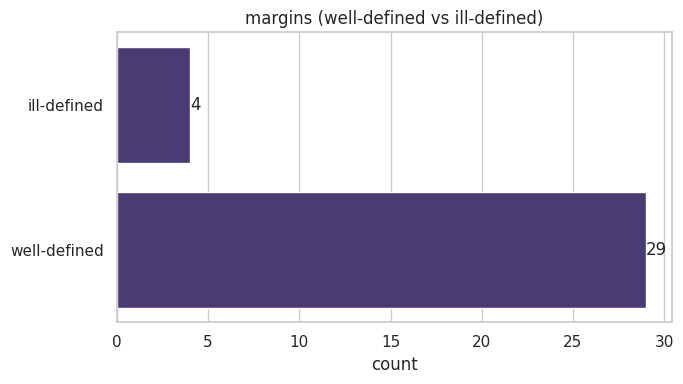

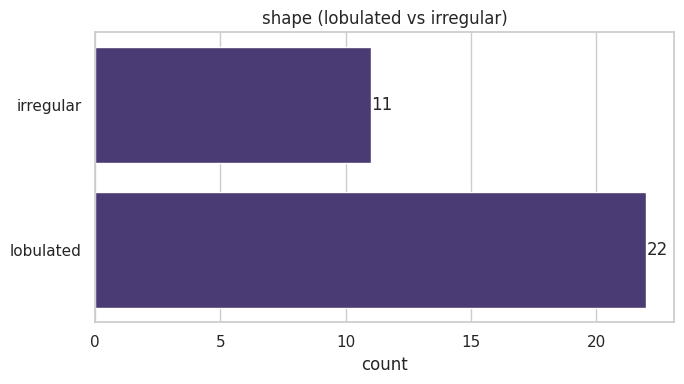

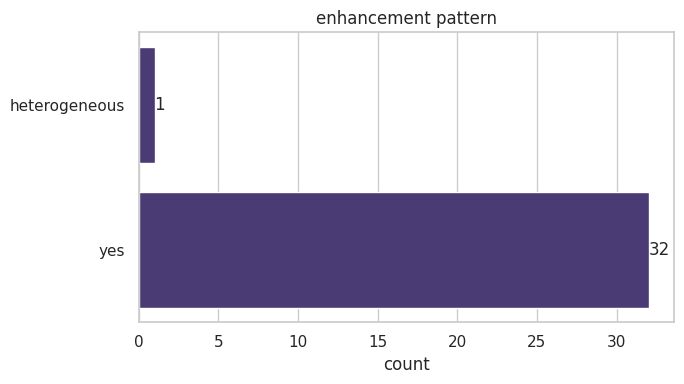

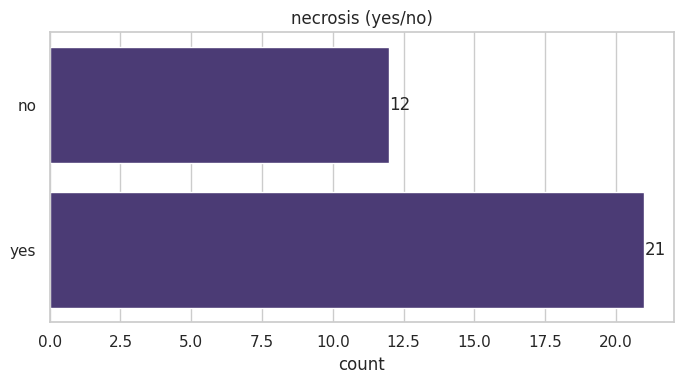

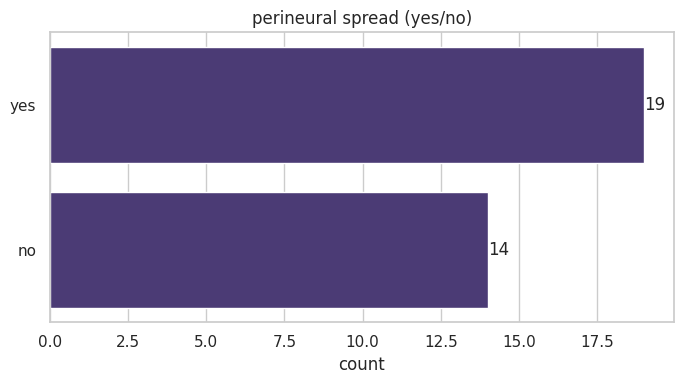

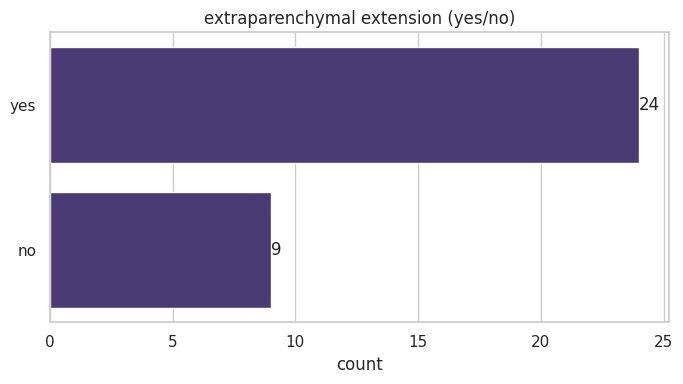

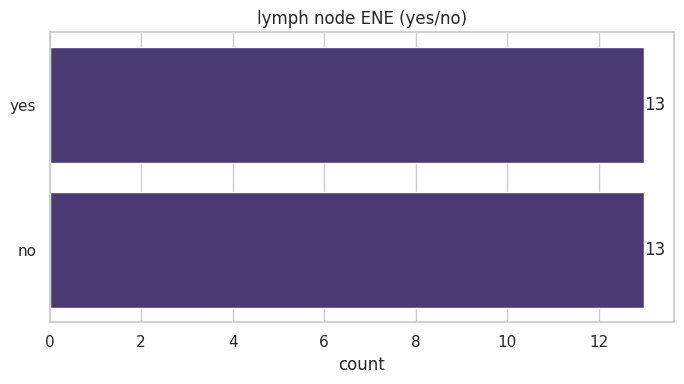

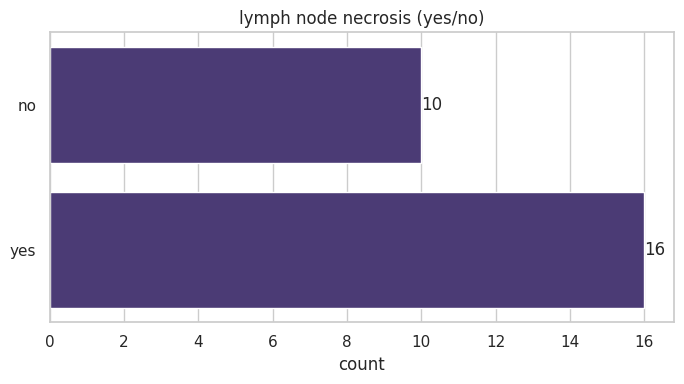

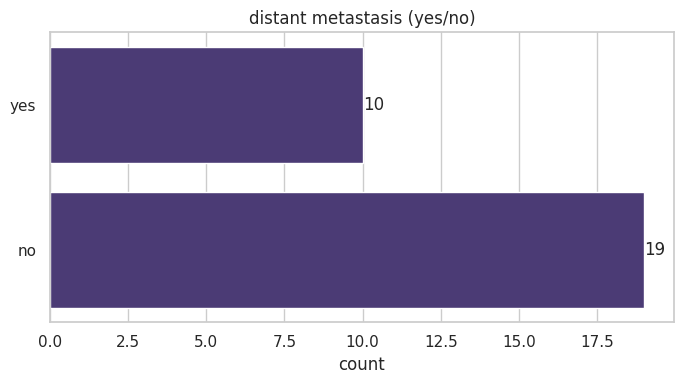

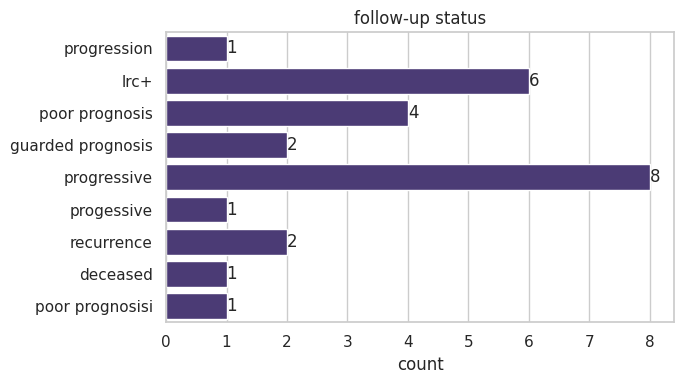

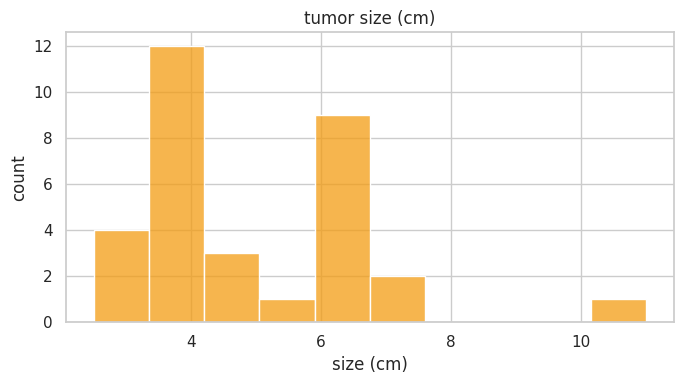

In [37]:
# === CELL 9: Descriptive visuals (colorful bar charts & histograms) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", style="whitegrid", palette="viridis")

def bar_plot(series, title):
    s = series.dropna()
    if s.empty:
        print(f"[skip] {title}: no data")
        return
    plt.figure(figsize=(7,4))
    ax = sns.countplot(y=s)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.xlabel("count"); plt.ylabel("")
    plt.tight_layout(); plt.show()

# plot standardized radiology features if present
for col, title in [
    ("margins_std","margins (well-defined vs ill-defined)"),
    ("shape_std","shape (lobulated vs irregular)"),
    ("enhancement_std","enhancement pattern"),
    ("necrosis_std","necrosis (yes/no)"),
    ("perineural_std","perineural spread (yes/no)"),
    ("extraparenchymal_std","extraparenchymal extension (yes/no)"),
    ("ln_ene_std","lymph node ENE (yes/no)"),
    ("ln_necrosis_std","lymph node necrosis (yes/no)"),
    ("distant_met_std","distant metastasis (yes/no)"),
    ("followup_std","follow-up status")
]:
    if col in work.columns:
        bar_plot(work[col], f"{title}")

# numeric visuals: size and RAI (RAI histogram done in cell 8; here we add size)
if "size_num" in work.columns and work["size_num"].notna().any():
    plt.figure(figsize=(7,4))
    sns.histplot(work["size_num"].dropna(), bins=10, kde=False, color="#F39C12")
    plt.title("tumor size (cm)"); plt.xlabel("size (cm)"); plt.ylabel("count")
    plt.tight_layout(); plt.show()
else:
    print("[skip] tumor size histogram: no data")


Cell 10 – Correlation Heatmaps

This part checks how strongly different features relate to each other.

For numeric variables (age, tumor size, RAI), we use Spearman correlation and show it as a colored heatmap.

For categorical variables (yes/no or text), we use Cramer’s V, another measure of association, and show a second heatmap.

The darker the color, the stronger the association between two features.

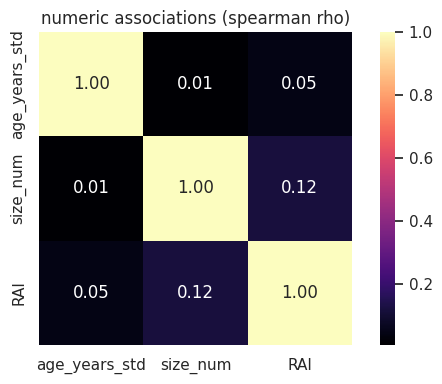

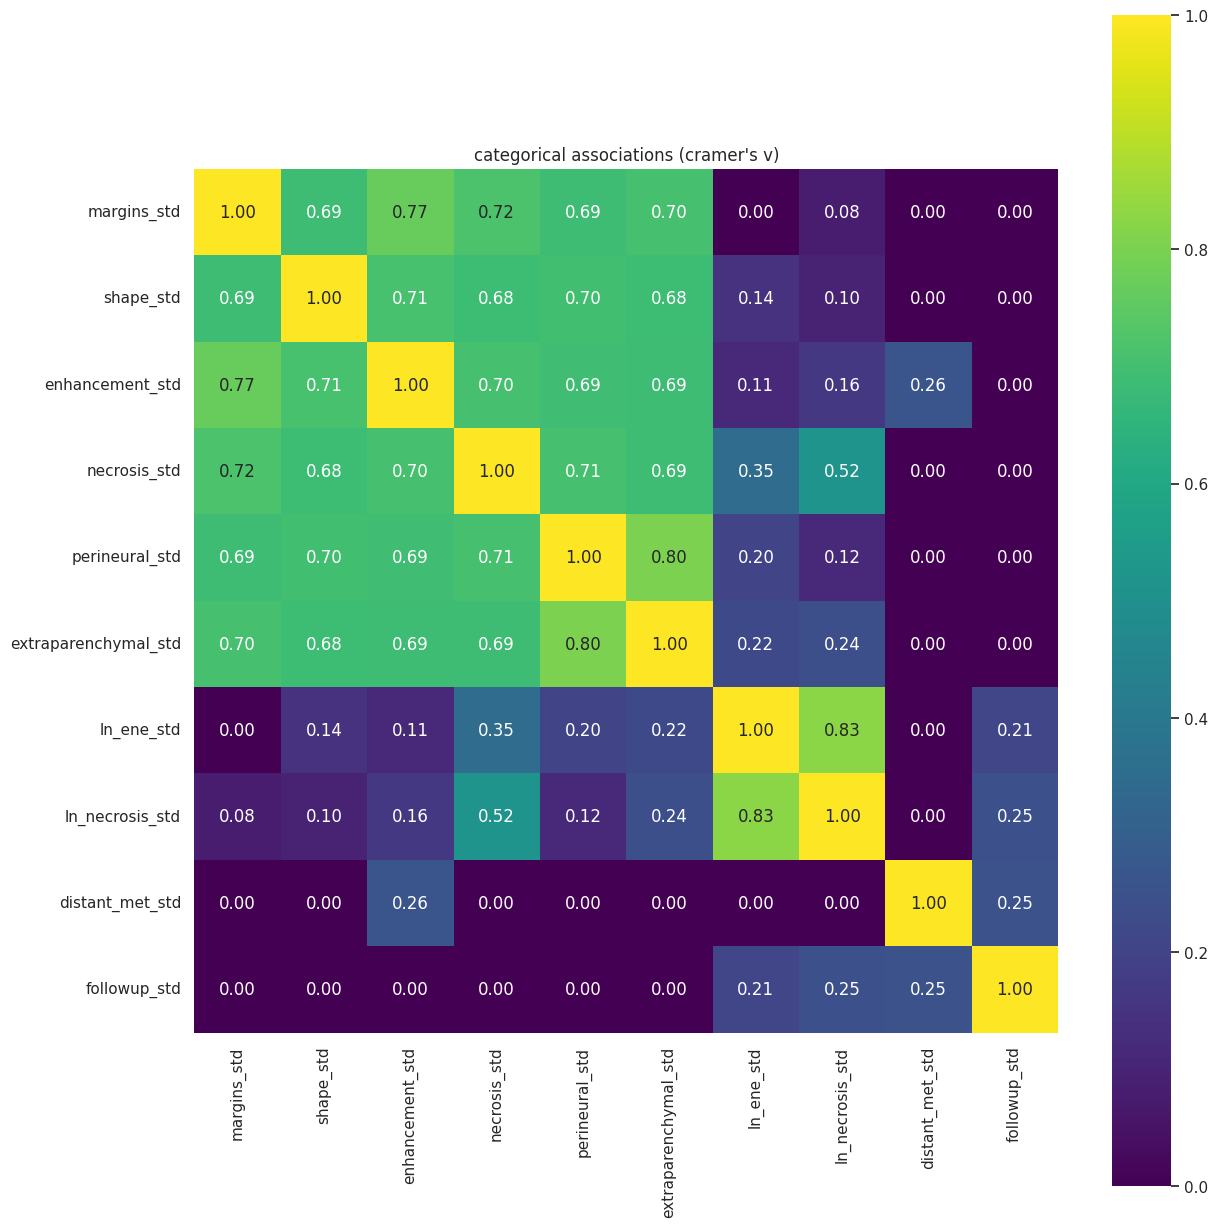

In [38]:
# === CELL 10: Correlation heatmaps (Spearman for numeric, Cramer's V for categorical) ===
from scipy import stats

# 10a) numeric correlations (Spearman)
num_cols = [c for c in ["age_years_std","size_num","RAI"] if c in work.columns]
if len(num_cols) >= 2 and work[num_cols].notna().sum().sum() > 0:
    rho = work[num_cols].corr(method="spearman")
    plt.figure(figsize=(6,4))
    sns.heatmap(rho, annot=True, cmap="magma", fmt=".2f", square=True, cbar=True)
    plt.title("numeric associations (spearman rho)")
    plt.tight_layout(); plt.show()
else:
    print("[skip] spearman heatmap: need at least two numeric columns with data (age_years_std, size_num, RAI)")

# 10b) categorical associations (Cramer's V)
def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        return np.nan
    chi2 = stats.chi2_contingency(ct, correction=False)[0]
    n = ct.values.sum()
    phi2 = chi2 / n
    r, k = ct.shape
    # bias correction (Bergsma 2013)
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    denom = max(1e-9, min((kcorr-1), (rcorr-1)))
    return np.sqrt(phi2corr / denom)

cat_cols = [c for c in [
    "margins_std","shape_std","enhancement_std","necrosis_std","perineural_std",
    "extraparenchymal_std","ln_ene_std","ln_necrosis_std","distant_met_std","followup_std"
] if c in work.columns]

if len(cat_cols) >= 2:
    cv = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for i,c1 in enumerate(cat_cols):
        for j,c2 in enumerate(cat_cols):
            cv.iloc[i,j] = 1.0 if i==j else cramers_v(work[c1].fillna("missing"), work[c2].fillna("missing"))
    plt.figure(figsize=(1.0*len(cat_cols)+3, 1.0*len(cat_cols)+3))
    sns.heatmap(cv, annot=True, fmt=".2f", cmap="viridis", square=True, cbar=True)
    plt.title("categorical associations (cramer's v)")
    plt.tight_layout(); plt.show()
else:
    print("[skip] cramer's v heatmap: need at least two categorical columns with data")


Cell 11 – Compare RAI with Outcomes

We now check if radiological aggressiveness (RAI) agrees with the final clinical outcome.

RAI is divided into benign-like, intermediate, and aggressive groups.

We compare these groups with distant metastasis and follow-up status.

Colorful stacked bar charts show whether higher RAI scores are linked with metastasis or poorer follow-up.

This tells us whether radiology predicts what histopathology and clinical course confirm.

RAI category counts:


,count
RAI_cat,
intermediate,16
benign-like,12
aggressive,5
NaN,1



RAI category x distant metastasis:


distant_met_std,no,yes,NaN
RAI_cat,,,
aggressive,3,1,1
benign-like,6,5,1
intermediate,10,3,3
NaN,0,1,0


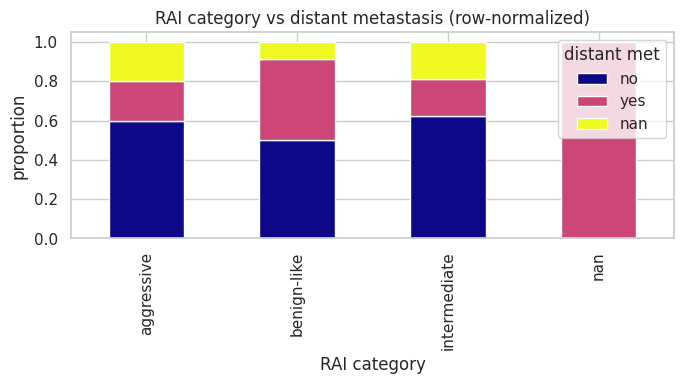

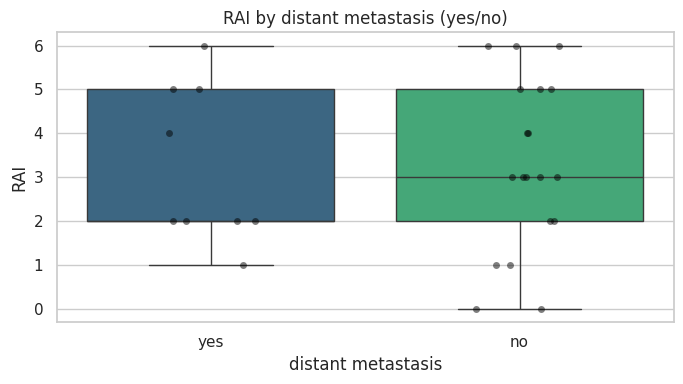


RAI category x follow-up status:


followup_std,deceased,guarded prognosis,lrc+,poor prognosis,poor prognosisi,progessive,progression,progressive,recurrence,NaN
RAI_cat,,,,,,,,,,
aggressive,0,1,0,0,1,0,0,2,0,1
benign-like,1,0,2,3,0,1,1,2,1,1
intermediate,0,1,4,1,0,0,0,4,1,5
NaN,0,0,0,0,0,0,0,0,0,1


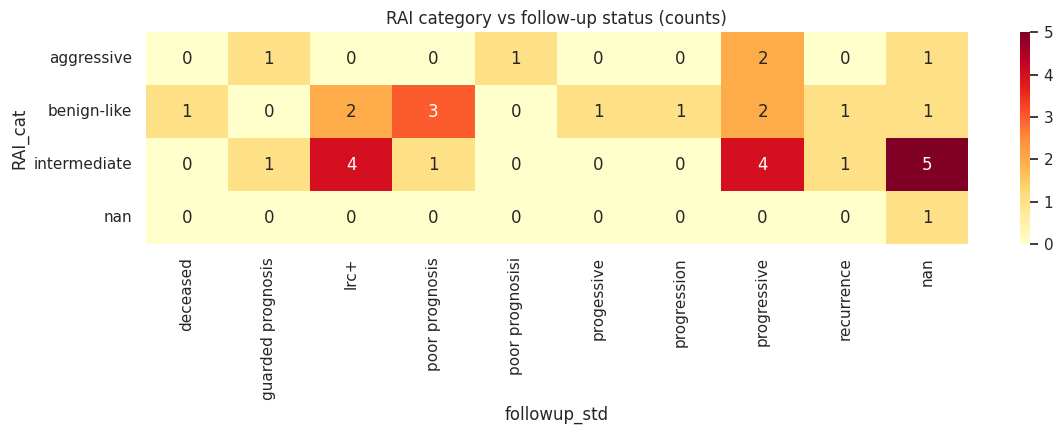

In [39]:
# === CELL 11: Agreement proxy — RAI categories vs outcomes, colorful plots ===

def rai_category(x):
    if pd.isna(x): return np.nan
    if x <= 2:  return "benign-like"
    if x <= 5:  return "intermediate"
    return "aggressive"

if "RAI" in work.columns:
    work["RAI_cat"] = work["RAI"].apply(rai_category)
    print("RAI category counts:")
    display(work["RAI_cat"].value_counts(dropna=False))

    # Cross-tab with distant metastasis
    if "distant_met_std" in work.columns:
        ct_dm = pd.crosstab(work["RAI_cat"], work["distant_met_std"], dropna=False)
        print("\nRAI category x distant metastasis:")
        display(ct_dm)
        # normalized bar plot
        ct_dm_norm = ct_dm.div(ct_dm.sum(axis=1), axis=0)
        ct_dm_norm.plot(kind="bar", stacked=True, colormap="plasma", figsize=(7,4))
        plt.title("RAI category vs distant metastasis (row-normalized)")
        plt.ylabel("proportion"); plt.xlabel("RAI category")
        plt.legend(title="distant met"); plt.tight_layout(); plt.show()

        # box/strip plot of RAI by distant mets
        plt.figure(figsize=(7,4))
        sns.boxplot(x=work["distant_met_std"], y=work["RAI"], palette="viridis")
        sns.stripplot(x=work["distant_met_std"], y=work["RAI"], color="black", alpha=0.5, jitter=0.15)
        plt.title("RAI by distant metastasis (yes/no)")
        plt.xlabel("distant metastasis"); plt.ylabel("RAI")
        plt.tight_layout(); plt.show()
    else:
        print("[note] 'distant_met_std' not available, skipping mets comparisons.")

    # Cross-tab with follow-up if present
    if "followup_std" in work.columns:
        ct_fu = pd.crosstab(work["RAI_cat"], work["followup_std"], dropna=False)
        print("\nRAI category x follow-up status:")
        display(ct_fu)
        # visualize top categories if many
        if ct_fu.shape[1] <= 12:
            plt.figure(figsize=(min(12, 1.2*ct_fu.shape[1]+4), 4.5))
            sns.heatmap(ct_fu, annot=True, fmt="d", cmap="YlOrRd")
            plt.title("RAI category vs follow-up status (counts)")
            plt.tight_layout(); plt.show()
        else:
            print("[note] follow-up has many categories; showing table only.")
else:
    print("[skip] RAI not found; run cell 8 first.")


Cell 12 – Optional Logistic Regression

This is a simple statistical model to quantify which radiological features best predict distant metastasis.

It gives an Odds Ratio (OR) for each variable:

OR > 1 means the feature increases the chance of metastasis.

OR < 1 means it’s less likely.

It also shows confidence intervals and p-values (for statistical significance).

In [40]:
# === CELL 12 (optional): Simple logistic regression (RAI & features -> distant metastasis) ===
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

if "distant_met_std" in work.columns:
    model_df = pd.DataFrame({"dm": work["distant_met_std"].map({"yes":1, "no":0})})
    # add predictors if present
    for pred in ["RAI","size_num","margins_aggr","enhance_aggr","pni_aggr","lnene_aggr","lnnec_aggr","epe_aggr","necrosis_aggr","shape_aggr"]:
        if pred in work.columns:
            model_df[pred] = work[pred]
    model_df = model_df.dropna()

    if model_df["dm"].nunique()==2 and len(model_df) >= 10:
        rhs = [c for c in model_df.columns if c != "dm"]
        formula = "dm ~ " + " + ".join(rhs)
        logit = smf.logit(formula=formula, data=model_df).fit(disp=False)
        print(logit.summary())

        params = logit.params
        conf = logit.conf_int()
        or_table = pd.DataFrame({
            "OR": np.exp(params),
            "CI_low": np.exp(conf[0]),
            "CI_high": np.exp(conf[1]),
            "p_value": logit.pvalues
        })
        print("\nodds ratios (with 95% CI):")
        display(or_table)
    else:
        print("[skip] logistic regression: need both yes/no outcomes and at least ~10 complete rows.")
else:
    print("[skip] distant_met_std not available; cannot run logistic regression.")


[skip] logistic regression: need both yes/no outcomes and at least ~10 complete rows.


Cell 13 – Discordant Cases

This identifies cases where radiology looked “benign-like” (low RAI) but the patient actually had a poor outcome (metastasis or recurrence).
These are false-negative radiology cases.

The table lists such patients (by case number or name).
Clinically, these are important because they show situations where radiology underestimated disease aggressiveness despite malignant histopathology.

In [41]:
# === CELL 13 (optional): List discordant cases — radiology benign-like but adverse biology ===

def is_poor_followup(s):
    if pd.isna(s): return False
    s = str(s).lower()
    tokens = ["progression","poor prognosis","guarded","recurrence","metastasis","metastatic","lrc-"]
    return any(t in s for t in tokens)

if "RAI_cat" in work.columns:
    adverse = pd.Series(False, index=work.index)
    if "distant_met_std" in work.columns:
        adverse |= (work["distant_met_std"]=="yes")
    if "followup_std" in work.columns:
        adverse |= work["followup_std"].apply(is_poor_followup)

    work["discordant_benign_like"] = (work["RAI_cat"]=="benign-like") & adverse

    cols_to_show = [c for c in ["case_no","path_no","patient_name","RAI","RAI_cat","distant_met_std","followup_std"] if c in work.columns]
    disc = work.loc[work["discordant_benign_like"], cols_to_show].reset_index(drop=True)
    print("discordant cases (radiology benign-like but adverse biology):")
    display(disc if not disc.empty else pd.DataFrame(columns=cols_to_show))
else:
    print("[skip] RAI_cat not available; run cell 11 first.")


discordant cases (radiology benign-like but adverse biology):


,case_no,path_no,patient_name,RAI,RAI_cat,distant_met_std,followup_std
0,18F2023/002175,013552/KF,Mr. RAMESH KUMAR DUBEY,2.0,benign-like,yes,progression
1,KE/08485,009945/KE,Mr. JAYRAM ..,2.0,benign-like,yes,progressive
2,KE/06798,007853/KE,Mr. OMPRAKASH .,2.0,benign-like,yes,progessive
3,KE/06805,006917/KE,Mr. RAMPYARE .,1.0,benign-like,NaN,poor prognosis
4,KD/14675,015619/CV,RAM KRIPAL SINGH,2.0,benign-like,yes,poor prognosis
5,KC/58818,508184/KD,Mr. LAL BABU,1.0,benign-like,no,recurrence
6,KD/06428,507017/KD,Mr. BHAIYALAL PATEL,1.0,benign-like,yes,poor prognosis


Overall Clinical Interpretation

Every case in the dataset is histopathologically confirmed as Salivary Duct Carcinoma (malignant).

The analysis compares whether radiological findings also appear malignant.

Features like ill-defined margins, irregular shape, heterogeneous enhancement, necrosis, perineural spread, and extraparenchymal extension usually correspond to aggressive behavior.

The Radiologic Aggressiveness Index (RAI) summarizes how strongly imaging suggests malignancy.

Heatmaps and bar charts help visualize how imaging variables relate and which ones commonly co-occur.

The agreement plots show if radiology and clinical outcomes align with histopathology.

The discordant list flags patients where imaging underestimated disease.*italicized text*
